referring for articles:
https://www.sbert.net/

In [7]:
import pandas as pd
import numpy as np
import preprocess
import utilities
import similarities
import parameters
import seaborn as sns
from numpy import dot
from numpy.linalg import norm
from itertools import combinations
import matplotlib.pyplot as plt
from tqdm import tqdm

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
data_paths = parameters.data_paths
sim_calculation_type = parameters.sim_calculation_type
all_sentence_embeddings =  parameters.huggingface_embeddings + parameters.openai_embeddings + parameters.google_embeddings

In [4]:
def calculate_between_class_similarities(col1, col2, X, y):
    
    sims = []
    
    for idx1 in y[y[col1]==1].index:
        for idx2 in y[y[col2]==1].index:
            sims.append(similarities.vector_similarity(X.loc[idx1], X.loc[idx2]))
    
    return sum(sims)/len(sims)     

In [5]:
def calculate_similarity_matrix(X, y, sim_method='cosine'):
    
    import similarities
    
    sim_df = pd.DataFrame(index=y.columns, columns=y.columns)
    
    for col in y.columns:
    
        indexes = y[y[col]==1].index
        sim_df.loc[col, col] = similarities.calculate_within_class_similarity(X.loc[indexes], sim_calculation_type)
    
    for col1, col2 in list(combinations(y.columns, 2)):
        sim_df.loc[col1, col2] = calculate_between_class_similarities(col1, col2, X, y)
    
    return sim_df

In [6]:
res_file = 'embedding_results_opp115.p'

import pickle
results = {}
with open(res_file, 'wb') as f:
    pickle.dump(results, f)

In [ ]:
data = 'opp115'
path = data_paths[data]

    
df = utilities.read_data(path)
X = df['text']
y = df.drop(['text'], axis=1)
X = X.apply(preprocess.preprocess_text)

import pickle
with open(res_file, 'rb') as f:
    results = pickle.load(f)

iterate = [i for i in all_sentence_embeddings if i not in results.keys()]
results['failed_embedings'] = []

for embedding_method in tqdm(iterate):

    try:
        X_num = utilities.vectorize_data(X, embedding_method)
        sim_df = calculate_similarity_matrix(X_num, y)
        results[embedding_method] = sim_df
        print(embedding_method, ' completed ... ')
    except:
        print('!!!! ',embedding_method, ' failed ... ')
        results['failed_embedings'].append(embedding_method)
    
    with open(res_file, 'wb') as f:
        pickle.dump(results, f)

  3%|██▏                                                                       | 1/34 [8:50:52<291:58:58, 31852.68s/it]

stsb-roberta-large  completed ... 


In [ ]:
stop

In [1]:
import pickle
with open('embedding_results_opp115.p', 'rb') as f:
    results_opp115 = pickle.load(f)
results_opp115.pop('failed_embedings')

['ALBERT-xlarge', 'ALBERT-xxlarg', 'text-similarity-davinci-001']

In [2]:
def calculate_matrix_score(sim_df):
    scores = []
    for col in sim_df.columns:
        scores.append((sim_df.loc[col, col] - sim_df.loc[col].drop(col).max())/sim_df.loc[col, col])
    return scores

In [3]:
removed = ['nlpaueb/legal-bert-base-uncased',
'bert-base-uncased',
'albert-base-v2',
'bert-base-nli-mean-tokens',
'distilbert-base-nli-mean-tokens',
'saibo/legal-roberta-base',
'sentence-t5-large',
'sentence-transformers/average_word_embeddings_glove.6B.300d',
'sentence-transformers/average_word_embeddings_glove.840B.300d',
'text-similarity-babbage-001',
'text-similarity-ada-001',
'text-similarity-curie-001',
'all-MiniLM-L12-v2']

In [12]:
res = results_opp115.copy()
final_res = {v:k for v, k in res.items() if v not in removed}

best:
'stsb-roberta-large'
'paraphrase-MiniLM-L6-v2'
'all-mpnet-base-v1'
'all-mpnet-base-v2'
'distiluse-base-multilingual-cased-v1'

In [13]:
for embedding, sim_df in final_res.items():
    scores = calculate_matrix_score(sim_df)[:-1]
    print(f'{embedding} --- max: {max(scores):.2f}, min: {min(scores):.2f}, avg: {sum(scores)/len(scores):.2f}')

stsb-roberta-large --- max: 0.30, min: -0.00, avg: 0.13
all-MiniLM-L6-v2 --- max: 0.40, min: -0.09, avg: 0.16
all-mpnet-base-v1 --- max: 0.46, min: -0.11, avg: 0.17
all-mpnet-base-v2 --- max: 0.46, min: -0.10, avg: 0.16
all-roberta-large-v1 --- max: 0.39, min: -0.08, avg: 0.15
all-distilroberta-v1 --- max: 0.41, min: -0.12, avg: 0.15
distiluse-base-multilingual-cased-v1 --- max: 0.45, min: -0.15, avg: 0.17
multi-qa-mpnet-base-dot-v1 --- max: 0.31, min: -0.08, avg: 0.11
paraphrase-multilingual-MiniLM-L12-v2 --- max: 0.45, min: -0.07, avg: 0.16
paraphrase-mpnet-base-v2 --- max: 0.45, min: -0.07, avg: 0.15
paraphrase-MiniLM-L6-v2 --- max: 0.49, min: -0.04, avg: 0.17
paraphrase-xlm-r-multilingual-v1 --- max: 0.39, min: -0.11, avg: 0.15
universal-sentence-encoder --- max: 0.42, min: -0.10, avg: 0.16


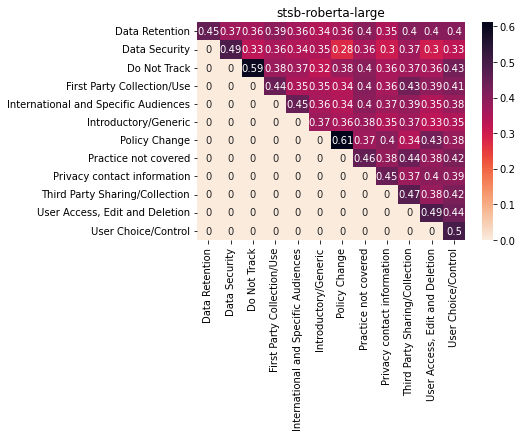

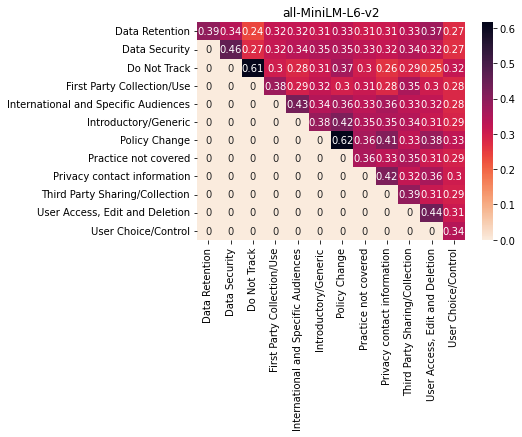

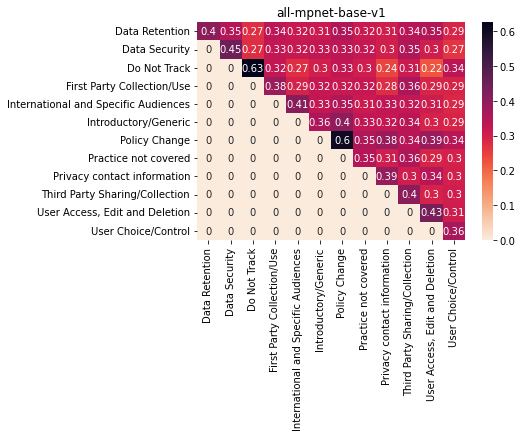

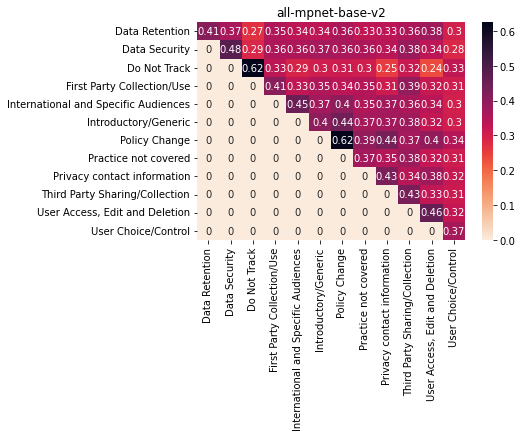

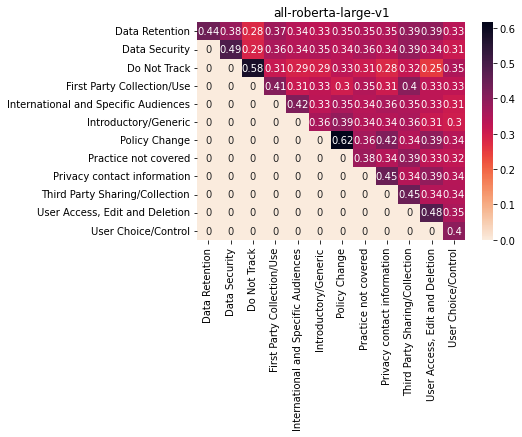

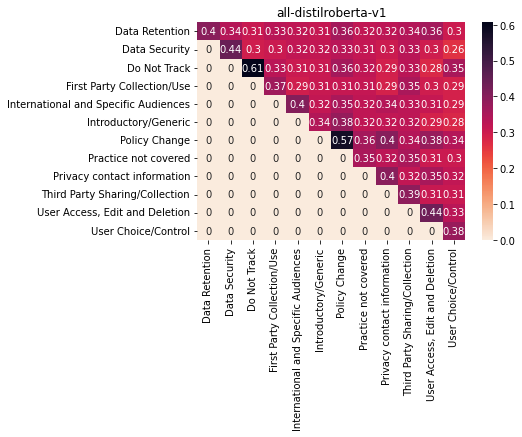

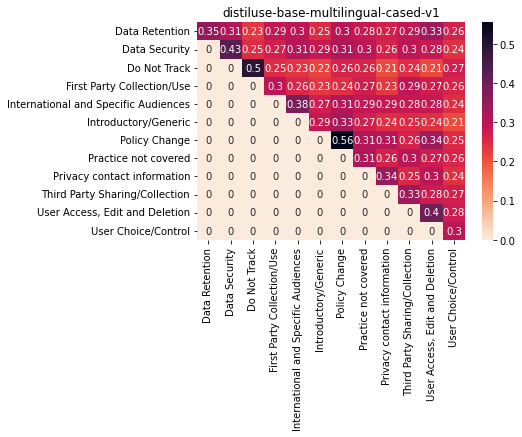

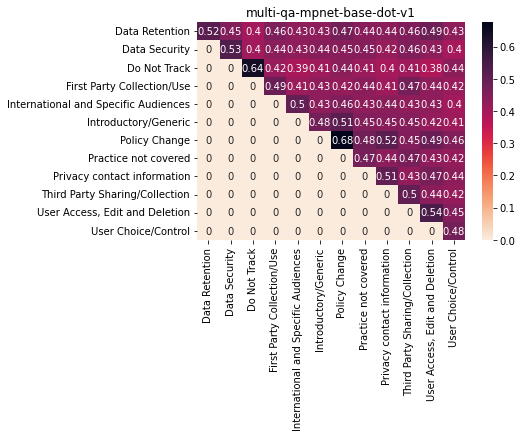

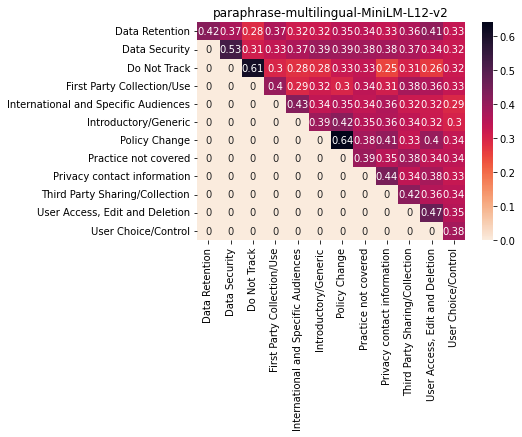

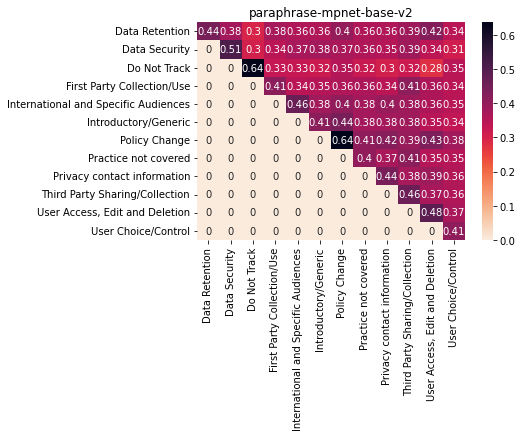

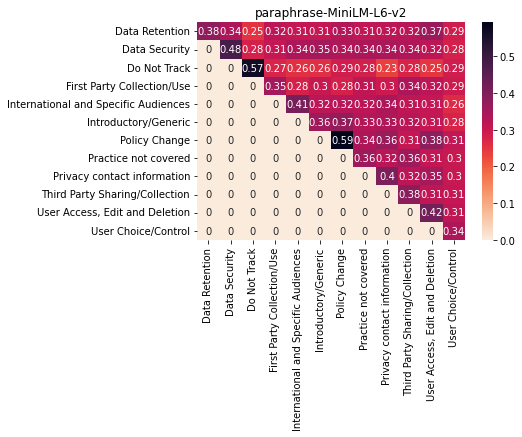

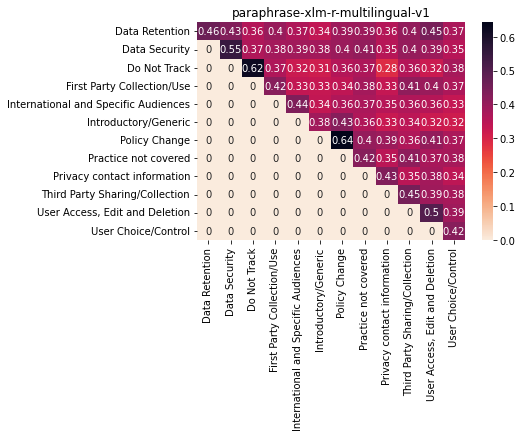

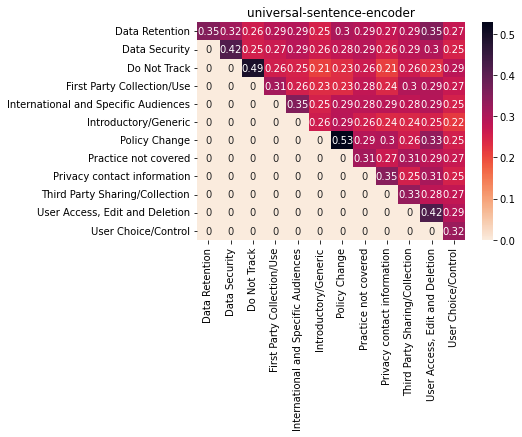

In [14]:
i = 0
for embedding, sim_df in final_res.items():
    
    plt.figure(i)
    plt.title(f'{embedding}')
    sns.heatmap(sim_df.fillna(0), annot=True,
    xticklabels=sim_df.columns,
    yticklabels=sim_df.columns, cmap="rocket_r")
    

    plt.show()
    i+=1

In [ ]:
stop

In [ ]:
model = AutoModel.from_pretrained(\"nlpaueb/legal-bert-base-uncased")
model = AutoModel.from_pretrained("saibo/legal-roberta-base")
                                  
tokenizer = AutoTokenizer.from_pretrained('saibo/legal-roberta-base')   

In [ ]:
sentence1 = 'I really love to play football'
sentence2 = 'Playing football is my passion.'

In [ ]:
def transform_sentence(sentence1, sentence2, model, preprocessing=False):
    
    model = SentenceTransformer(model)
    
    if preprocessing:
        import preprocess
        sentence1 = preprocess.preprocess_text(sentence1)
        sentence2 = preprocess.preprocess_text(sentence2)
        
    embedding1 = model.encode(sentence1, convert_to_tensor=True)
    embedding2 = model.encode(sentence2, convert_to_tensor=True)
    
    cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
    
    return cosine_scores

In [ ]:
from transformers import AutoTokenizer, AutoModel

import torch


#Mean Pooling - Take attention mask into account for correct averaging

def mean_pooling(model_output, attention_mask):

    token_embeddings = model_output[0] #First element of model_output contains all token embeddings

    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()

    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

In [ ]:
model_name = 
'saibo/legal-roberta-base'
'nlpaueb/legal-bert-base-uncased'
'nlpaueb/legal-bert-small-uncased'
'saibo/legal-roberta-base'
'albert-base-v2'
'ALBERT-xlarge'
'ALBERT-xxlarg'

tokenizer = AutoTokenizer.from_pretrained(model_name)    
text_tensor1 = tokenizer.encode(sentence1, padding=True, truncation=True, return_tensors='pt')
text_tensor1 = tokenizer.encode(sentence2, padding=True, truncation=True, return_tensors='pt')

model = AutoModel.from_pretrained(model_name)

with torch.no_grad():

    output1 = model(text_tensor1)
    output2 = model(text_tensor2)

sentence_embeddings1 = mean_pooling(output1, text_tensor1)
sentence_embeddings2 = mean_pooling(output2, text_tensor2)

cosine_scores = util.pytorch_cos_sim(sentence_embeddings1, sentence_embeddings2)

print(cosine_scores.item())

print(sentence_embeddings1.shape, sentence_embeddings2.shape)


In [ ]:
model = SentenceTransformer('stsb-roberta-large')

In [ ]:
sentence1 = 'I love to play football because I am a player'
sentence2 = 'Playing football is my passion.'

In [ ]:
embedding1 = model.encode(sentence1, convert_to_tensor=True)
embedding2 = model.encode(sentence2, convert_to_tensor=True)
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
print(cosine_scores.item())

embedding1 = model.encode(preprocess.preprocess_text(sentence1), convert_to_tensor=True)
embedding2 = model.encode(preprocess.preprocess_text(sentence2), convert_to_tensor=True)
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
print(cosine_scores.item())

In [ ]:
https://medium.com/nlplanet/two-minutes-nlp-11-word-embeddings-models-you-should-know-a0581763b9a9

In [ ]:
"http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1405-55462016000400647"

In [ ]:
from re import sub
from gensim.utils import simple_preprocess
import gensim.downloader as api
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.similarities import WordEmbeddingSimilarityIndex
from gensim.similarities import SparseTermSimilarityMatrix
from gensim.similarities import SoftCosineSimilarity

In [ ]:
query_string = 'fruit and vegetables'
documents = ['cars drive on the road', 'tomatoes are actually fruit']

stopwords = ['the', 'and', 'are', 'a']

# From: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/soft_cosine_tutorial.ipynb
def preprocess(doc):
    # Tokenize, clean up input document string
    doc = sub(r'<img[^<>]+(>|$)', " image_token ", doc)
    doc = sub(r'<[^<>]+(>|$)', " ", doc)
    doc = sub(r'\[img_assist[^]]*?\]', " ", doc)
    doc = sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', " url_token ", doc)
    return [token for token in simple_preprocess(doc, min_len=0, max_len=float("inf")) if token not in stopwords]

In [ ]:
query_string = 'fruit and vegetables'
documents = ['cars drive on the road', 'tomatoes are actually fruit']

In [ ]:
documents = ["I like Python because I can build AI applications",
          "I like Python because I can do data analytics",
          "The cat sits on the ground",
         "The cat walks on the sidewalk"]

query_string = "I like Javascript because I can build web applications"

In [ ]:
# Preprocess the documents, including the query string
corpus = [preprocess(document) for document in documents]
query = preprocess(query_string)

In [ ]:
# Load the model: this is a big file, can take a while to download and open
glove = api.load("glove-wiki-gigaword-50")    
similarity_index = WordEmbeddingSimilarityIndex(glove)

# Build the term dictionary, TF-idf model
dictionary = Dictionary(corpus+[query])
tfidf = TfidfModel(dictionary=dictionary)

# Create the term similarity matrix.  
similarity_matrix = SparseTermSimilarityMatrix(similarity_index, dictionary, tfidf)

In [ ]:
# Compute Soft Cosine Measure between the query and the documents.
# From: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/soft_cosine_tutorial.ipynb
query_tf = tfidf[dictionary.doc2bow(query)]

index = SoftCosineSimilarity(
            tfidf[[dictionary.doc2bow(document) for document in corpus]],
            similarity_matrix)

doc_similarity_scores = index[query_tf]

# Output the sorted similarity scores and documents
sorted_indexes = np.argsort(doc_similarity_scores)[::-1]
for idx in sorted_indexes:
    print(f'{idx} \t {doc_similarity_scores[idx]:0.3f} \t {documents[idx]}')


In [ ]:
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1405-55462016000400647